In [4]:
# Import standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Memuat file drug200.csv menjadi pandas dataframe
dataframe = pd.read_csv('drug200.csv')

# Menampilkan 5 baris pertama dari dataframe
dataframe.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [8]:
# info dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
# Import LabelEncoder dari module sklearn
from sklearn.preprocessing import LabelEncoder

# Menyalin / copy dataframe agar dataframe awal tetap utuh
dataframe_int = dataframe.copy()

# Membuat objek/instance yang bernama encoder
encoder = LabelEncoder()

# Membuat list dari nama kolom data kategori
categorical_data = ['Sex','BP','Cholesterol','Drug']

# Mengubah setiap data kategori menjadi numerik dengan encoder
for kolom in categorical_data:
    dataframe_int[kolom] = encoder.fit_transform(dataframe[kolom])
	
# Sekarang data sudah berupa angka sepenuhnya
dataframe_int.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [12]:
def distribusi():
    fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
    plt.suptitle('Distribusi',fontsize=24)
    
    def kolom_generator():
        for kolom in dataframe_int:
            yield kolom
    kolom = kolom_generator()

    for i in range(0,2):
        for j in range(0,3):
            k = next(kolom)
            dataframe_int[k].plot(kind='hist',ax=axes[i,j])
            axes[i,j].set_title(k)
    plt.show()

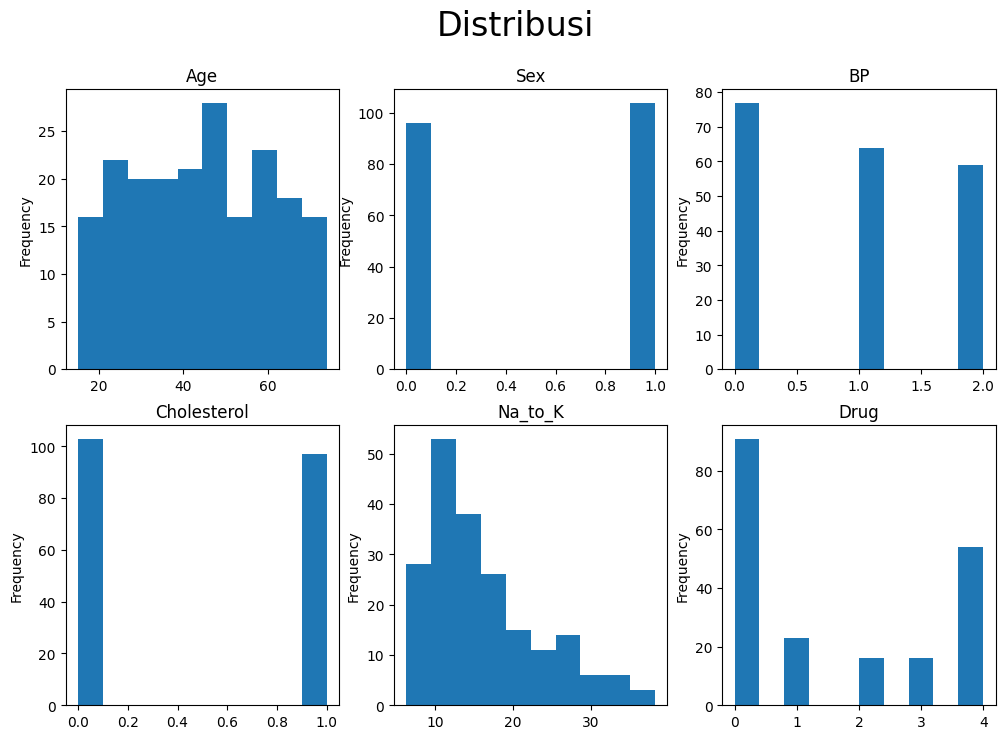

In [13]:
distribusi()

In [14]:

# Memisahkan dataframe awal menjadi data dan label
data = dataframe_int.drop('Drug',axis=1)
label = dataframe_int['Drug']

# Memisahkan dataframe menjadi data latihan dan data tes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

# Print dataframe.shape untuk mengetahui bentuk dataframe
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(160, 5) (160,)
(40, 5) (40,)
